# BLU02 - Learning Notebook - Data wrangling workflows - Part 1 of 3

In [1]:
import numpy as np
import pandas as pd
import os

from sklearn.datasets import load_iris

# About the BLU 

## Data wrangling workflows

A typical data science workflow goes as follows: you get data from a source, you clean it, and then you continuously iterate on it.

![data_transformation_workflow](./media/data_processing_workflow.png)

On the previous learning unit in this specialization, we focused mostly on getting and cleaning data (the blue boxes above). 

At this point, we got a dataset and performed necessary data cleaning. Our data is, therefore, in an interim state:
* You have a *tidy dataset* (observations as rows and features as columns), comprised of one or more tables
* You know how to import such tables into Pandas, regardless of the format they are stored.

Now, to explore, visualize and model the data, we have to perform transformations on it with agility, balancing:
* Speed of iteration, testing different hypothesis fast and easy
* Consistency, ensuring our pipeline doesn't collapse along the way.

In this first part, we'll go into how to transform the dataset and explore it in Pandas.

Then, we'll zoom in on a how to combine dataframes.

Finally, we'll move to scikit-learn to build efficient pipelines for modeling.

# About the data

The New York Philharmonic played its first concert on December 7, 1842.

The data documents all known concerts, amounting to more than 20,000 performances. Some considerations:
* The Program is the top-most level element in the dataset
* A Program is defined as performances in which the repertoire, conductors, and soloists are the same
* A Program is associated with an Orchestra (e.g., New York Philharmonic) and a Season (e.g., 1842-43)
* A Program may have multiple Concerts with different dates, times and locations
* A Program's repertoire may contain various Works (e.g., two different symphonies by Beethoven)
* A Work can have multiple Soloists (e.g., Mahler on the harpsichord, Strauss or Bernstein on the piano).

**For more information about the dataset, including the data dictionary, please head to the README.**

In this unit, we will be using Works and Concerts, imported as follows.

In [2]:
works = pd.read_csv('./data/works.csv')
concerts = pd.read_csv('./data/concerts.csv')

In [3]:
works.head()

,GUID,ProgramID,WorkID,MovementID,ComposerName,WorkTitle,Movement,ConductorName,Interval
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,52446,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67",NaN,"Hill, Ureli Corelli",NaN
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,52437,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 3 IN E FLAT MAJOR, OP. 55 (EROICA)",NaN,"Hill, Ureli Corelli",NaN
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,52364,1.0,"Beethoven, Ludwig van","EGMONT, OP.84",Overture,"Hill, Ureli Corelli",NaN
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,52434,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 2 IN D MAJOR, OP.36",NaN,"Boucher, Alfred",NaN
4,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,52453,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 7 IN A MAJOR, OP.92",NaN,"Hill, Ureli Corelli",NaN


In [4]:
concerts.head()

,GUID,ProgramID,ConcertID,EventType,Location,Venue,Date,Time
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00+00:00,8:00PM
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-02-18T05:00:00+00:00,8:00PM
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,0,Special,"Manhattan, NY",Apollo Rooms,1843-04-07T05:00:00+00:00,8:00PM
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-04-22T05:00:00+00:00,8:00PM
4,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-11-18T05:00:00+00:00,NaN


In [55]:
works.ProgramID.count()
works.ProgramID.nunique()
works.nunique()
works[works.duplicated(subset=['ProgramID', 'WorkID','MovementID'], keep=False)].sort_values(by=['ProgramID', 'WorkID','MovementID'])

,GUID,ProgramID,WorkID,MovementID,ComposerName,WorkTitle,Movement,ConductorName,Interval
60980,cc889f1b-4283-414b-b1b3-79f354a9c9ab,710,0,NaN,NaN,NaN,NaN,NaN,Intermission
60981,d5c39c72-0b19-4d69-bf6f-c116fb96a834-0.1,710,0,NaN,NaN,NaN,NaN,NaN,Intermission
40337,cc889f1b-4283-414b-b1b3-79f354a9c9ab,710,4599,NaN,"Kummer, Friedrich August",GRANDE FANTASIE RUSSE FOR CELLO,NaN,"Bergmann, Carl",NaN
40338,d5c39c72-0b19-4d69-bf6f-c116fb96a834-0.1,710,4599,NaN,"Kummer, Friedrich August",GRANDE FANTASIE RUSSE FOR CELLO,NaN,"Bergmann, Carl",NaN
14036,cc889f1b-4283-414b-b1b3-79f354a9c9ab,710,4968,NaN,"Rietz, Julius",QUINTET,NaN,"Bergmann, Carl",NaN
14037,d5c39c72-0b19-4d69-bf6f-c116fb96a834-0.1,710,4968,NaN,"Rietz, Julius",QUINTET,NaN,"Bergmann, Carl",NaN
27369,cc889f1b-4283-414b-b1b3-79f354a9c9ab,710,6709,13.0,"Weber, Carl Maria Von","FREISCHUTZ, DER","""Wie nahte mir der Schlummer...Leise, leise, f...","Bergmann, Carl",NaN
27370,d5c39c72-0b19-4d69-bf6f-c116fb96a834-0.1,710,6709,13.0,"Weber, Carl Maria Von","FREISCHUTZ, DER","""Wie nahte mir der Schlummer...Leise, leise, f...","Bergmann, Carl",NaN
129,cc889f1b-4283-414b-b1b3-79f354a9c9ab,710,8955,1.0,"Mozart, Wolfgang Amadeus","MAGIC FLUTE, THE, K.620",Overture,"Bergmann, Carl",NaN
130,d5c39c72-0b19-4d69-bf6f-c116fb96a834-0.1,710,8955,1.0,"Mozart, Wolfgang Amadeus","MAGIC FLUTE, THE, K.620",Overture,"Bergmann, Carl",NaN


# 1 Data transformation

## 1.1 Transformations as functions 

Most data transformations operate on dataframes: they receive a local dataframe, transform it and return a new one.

In its simplest form, this is the signature of a generic data transformer.

In [5]:
def data_transformer(df):
    df = df.copy()
    # df = ...
    return df

Such transformations have no side effects and operate as functions on immutable data (i.e., they keep the original dataframe unchanged).

Since the output depends only on the arguments, calling them with the same arguments always produces the same result.

Confusing? Not really.

In [6]:
def rename_column(df, new_name, old_name):
    df = df.copy()
    df[new_name] = df[old_name]
    df = df.drop(columns=old_name)
    return df

def test_dataframe():
    data = np.random.randn(6, 4)
    columns = ['A', 'B', 'C', 'D']
    return pd.DataFrame(data=data, columns=columns)

df = test_dataframe()

rename_column(df, 'Z', 'A')

,B,C,D,Z
0,-0.266289,3.082971,-0.941685,1.702371
1,-0.905506,-2.106767,-1.597949,0.446181
2,0.378139,-0.277844,-0.288708,1.668544
3,2.227402,1.516974,-1.970619,0.161969
4,-0.112727,0.202026,-0.988840,-0.669036
5,-0.758583,-0.818902,0.626686,-2.767385


In [7]:
rename_column(df, 'Z', 'A')

,B,C,D,Z
0,-0.266289,3.082971,-0.941685,1.702371
1,-0.905506,-2.106767,-1.597949,0.446181
2,0.378139,-0.277844,-0.288708,1.668544
3,2.227402,1.516974,-1.970619,0.161969
4,-0.112727,0.202026,-0.988840,-0.669036
5,-0.758583,-0.818902,0.626686,-2.767385


The same result, see! The program (or Notebook) remembers nothing but the original data and the function itself: a white canvas!

What about the original dataframe?

In [8]:
df

,A,B,C,D
0,1.702371,-0.266289,3.082971,-0.941685
1,0.446181,-0.905506,-2.106767,-1.597949
2,1.668544,0.378139,-0.277844,-0.288708
3,0.161969,2.227402,1.516974,-1.970619
4,-0.669036,-0.112727,0.202026,-0.988840
5,-2.767385,-0.758583,-0.818902,0.626686


After each call, the program *state* is the same as it was before (no new objects, no changes, no nothing!), as if nothing happened.

This property is valid for as long as we don't explicitly overwrite the original dataframe outside the function, using an assignment.

In [9]:
df = test_dataframe()
df = rename_column(df, 'Z', 'A')

try:
    rename_column(df, 'Z', 'A')
except:
    print("For some reason this doesn't work. Why is that?")

For some reason this doesn't work. Why is that?


Mutable data is dangerous because it makes programs unpredictable. And this is why you should avoid modifying objects after creation.

Such pitfall is common in Notebooks, especially when you re-run cells, run them in a different order or restart the Kernel. (Am I right?)

**Data transformation is a *pipeline***

Another problem is that data transformation is about applying multiple, sequential changes to the data (i.e., a multistep process).

![data_transformation_pipeline](./media/data_transformation_pipeline.png)

*Fig 2. - A data transformation pipeline is a multistep process.*

And once we realize this, how do we go about it?

In [10]:
df = test_dataframe()

df_renamed = rename_column(df, 'Z', 'A')
# Code happens. Ideas are tested, hours go by.
df_renamed_without_b = df_renamed.drop(columns='B')
# More code happens. We keep on testing ideas, days go by.
df_renamed_without_b_positive = df_renamed_without_b[df_renamed_without_b > 0]
# There's a lot of code. Ideas come and go, we've been doing this for a week.
df_renamed_without_b_positive_no_nans = df_renamed_without_b_positive.dropna(how='all')
# Can we honestly trace back how to get from df to here? Probably not.
df_renamed_without_b_positive_no_nans

,C,D,Z
0,NaN,NaN,0.803130
1,0.055710,0.836145,0.885018
2,NaN,1.021075,1.185117
3,NaN,NaN,1.395096
4,1.059134,NaN,1.024389
5,0.820107,NaN,NaN


Using functions instead, you concisely encapsulate everything. 

(Also, you spend less time naming things, unless you want to.)

In [11]:
def data_transformer(df, how_to_dropna):
    df = df.copy()
    df = rename_column(df, 'Z', 'A')
    df = df.drop(columns='B')
    df = df[df > 0]
    df = df.dropna(how=how_to_dropna)
    return df

data_transformer(df, how_to_dropna='all')

,C,D,Z
0,NaN,NaN,0.803130
1,0.055710,0.836145,0.885018
2,NaN,1.021075,1.185117
3,NaN,NaN,1.395096
4,1.059134,NaN,1.024389
5,0.820107,NaN,NaN


This function is a bad one: names are not explicit, and there are no apparent blocks of logic.

Functions should organize and document our codebase (*what* you are doing and how).

Using functions, immutable data and avoiding side effects is a smart choice to manage complexity and keep things understandable.

Alternatively, we could structure our functions more like this.

In [12]:
def preprocess_data():
    df = df.copy()
    # df = rename_misspelled_columns(df)
    # df = drop_unnecessary_columns(df)
    # df = keep_only_positive_values(df)
    # df = removemissing_values(df)
    return df

## 1.2 Data transformation in Pandas

Pandas provides convenient methods for most data transformation tasks, with a unified, well-known syntax and consistent interfaces.

For example, we don't need to create a `rename_column()` function, since Pandas already provides a `df.rename()` method for us.

In [13]:
df = test_dataframe()

df.rename({'A': 'Z'}, axis=1)

,Z,B,C,D
0,0.598193,-0.967271,-0.980052,-0.878503
1,0.831445,1.081508,-0.836292,-0.578561
2,0.212106,0.399507,-1.330149,0.348545
3,1.651449,0.286606,0.757990,-1.100310
4,-0.789647,-0.086643,1.371210,0.028979
5,-0.131002,0.226395,-0.538640,-0.819787


As a recap: `df.rename()` follows our transformer signature:
* It takes a dataframe as input 
* And returns a new one as output.

This predictable input/output is what we mean by consistent interfaces! 

It seems very promising to build and multistep pipelines, no? What transformations can we perform this way?

### 1.2.1 Subsetting columns or the index

#### Take a subset of indexes or columns

Pandas implements this functionality, somewhat counterintuitively, as `df.filter()`.

Imagine that we want only the columns related to the work itself, excluding IDs.

In [14]:
work_related_columns = ['ComposerName', 'WorkTitle', 'Movement']
# Select columns by name.
works.filter(items=work_related_columns).head()

,ComposerName,WorkTitle,Movement
0,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67",NaN
1,"Beethoven, Ludwig van","SYMPHONY NO. 3 IN E FLAT MAJOR, OP. 55 (EROICA)",NaN
2,"Beethoven, Ludwig van","EGMONT, OP.84",Overture
3,"Beethoven, Ludwig van","SYMPHONY NO. 2 IN D MAJOR, OP.36",NaN
4,"Beethoven, Ludwig van","SYMPHONY NO. 7 IN A MAJOR, OP.92",NaN


We can also use it to subset our dataframe based on the index.

In [71]:
# Select rows containing 'Glass' on the index.
works.set_index('ComposerName').filter(like='Glass', axis=0).reset_index().head()

,ComposerName,GUID,ProgramID,WorkID,MovementID,WorkTitle,Movement,ConductorName,Interval
0,"Glass, Philip",cf230066-2cd2-4093-8b78-b91b8dda3cbf,11639,5729,NaN,KOYAANISQATSI,NaN,"Riesman, Michael",NaN
1,"Glass, Philip",adf68bf5-db9d-4b24-aac6-c9b7c398cf06,14047,12401,NaN,"""FATHER DEATH BLUES"" FROM HYDROGEN JUKEBOX",NaN,"Sainte-Agathe, Valérie",NaN
2,"Glass, Philip",990a8f66-cd5f-466e-b3b6-800baa6c0b47-0.1,14189,12547,NaN,"QUARTET, STRING, NO. 3 (MISHIMA)",NaN,NaN,NaN
3,"Glass, Philip",3d50968c-2e8b-405f-969c-ba36f941f393,14189,12547,NaN,"QUARTET, STRING, NO. 3 (MISHIMA)",NaN,NaN,NaN
4,"Glass, Philip",fb8e7125-7ef9-492e-a820-914467475701,14025,12327,NaN,SARABANDE IN COMMON TIME (SOLO VIOLIN),NaN,NaN,NaN


In [73]:
# Select rows containing 'Glass' on the index.
works.set_index('ComposerName').filter(like='Glass', axis=0).reset_index()

,ComposerName,GUID,ProgramID,WorkID,MovementID,WorkTitle,Movement,ConductorName,Interval
0,"Glass, Philip",cf230066-2cd2-4093-8b78-b91b8dda3cbf,11639,5729,NaN,KOYAANISQATSI,NaN,"Riesman, Michael",NaN
1,"Glass, Philip",adf68bf5-db9d-4b24-aac6-c9b7c398cf06,14047,12401,NaN,"""FATHER DEATH BLUES"" FROM HYDROGEN JUKEBOX",NaN,"Sainte-Agathe, Valérie",NaN
2,"Glass, Philip",990a8f66-cd5f-466e-b3b6-800baa6c0b47-0.1,14189,12547,NaN,"QUARTET, STRING, NO. 3 (MISHIMA)",NaN,NaN,NaN
3,"Glass, Philip",3d50968c-2e8b-405f-969c-ba36f941f393,14189,12547,NaN,"QUARTET, STRING, NO. 3 (MISHIMA)",NaN,NaN,NaN
4,"Glass, Philip",fb8e7125-7ef9-492e-a820-914467475701,14025,12327,NaN,SARABANDE IN COMMON TIME (SOLO VIOLIN),NaN,NaN,NaN
5,"Glass, Philip",70857ba1-11aa-44d1-b58e-dbc252899758,13985,12547,1.0,"QUARTET, STRING, NO. 3 (MISHIMA)",1957: Award Montage,NaN,NaN


In [86]:
works['ComposerName'].str.contains('Glass').value_counts(dropna=False)
#works['ComposerName'].str.contains('Glass').fillna(value=False).value_counts(dropna=False)
#works['ComposerName'].describe()

False    71290
NaN      11280
True         6
Name: ComposerName, dtype: int64

In [91]:
works['ComposerName'].str.contains('Glass').fillna(value=False).value_counts(dropna=False)
composer_filter = works['ComposerName'].str.contains('Glass').fillna(value=False)
works[composer_filter]

,GUID,ProgramID,WorkID,MovementID,ComposerName,WorkTitle,Movement,ConductorName,Interval
13101,cf230066-2cd2-4093-8b78-b91b8dda3cbf,11639,5729,NaN,"Glass, Philip",KOYAANISQATSI,NaN,"Riesman, Michael",NaN
13758,adf68bf5-db9d-4b24-aac6-c9b7c398cf06,14047,12401,NaN,"Glass, Philip","""FATHER DEATH BLUES"" FROM HYDROGEN JUKEBOX",NaN,"Sainte-Agathe, Valérie",NaN
13901,990a8f66-cd5f-466e-b3b6-800baa6c0b47-0.1,14189,12547,NaN,"Glass, Philip","QUARTET, STRING, NO. 3 (MISHIMA)",NaN,NaN,NaN
13902,3d50968c-2e8b-405f-969c-ba36f941f393,14189,12547,NaN,"Glass, Philip","QUARTET, STRING, NO. 3 (MISHIMA)",NaN,NaN,NaN
40060,fb8e7125-7ef9-492e-a820-914467475701,14025,12327,NaN,"Glass, Philip",SARABANDE IN COMMON TIME (SOLO VIOLIN),NaN,NaN,NaN
40106,70857ba1-11aa-44d1-b58e-dbc252899758,13985,12547,1.0,"Glass, Philip","QUARTET, STRING, NO. 3 (MISHIMA)",1957: Award Montage,NaN,NaN


In [89]:
71290+11280

82570

### 1.2.2 Drop columns

Additionally, `GUID` and `ProgramID` are pretty redundant. We can get rid of `GUID`.

In [16]:
works.drop(columns='GUID').head()

,ProgramID,WorkID,MovementID,ComposerName,WorkTitle,Movement,ConductorName,Interval
0,3853,52446,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67",NaN,"Hill, Ureli Corelli",NaN
1,5178,52437,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 3 IN E FLAT MAJOR, OP. 55 (EROICA)",NaN,"Hill, Ureli Corelli",NaN
2,10785,52364,1.0,"Beethoven, Ludwig van","EGMONT, OP.84",Overture,"Hill, Ureli Corelli",NaN
3,5887,52434,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 2 IN D MAJOR, OP.36",NaN,"Boucher, Alfred",NaN
4,305,52453,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 7 IN A MAJOR, OP.92",NaN,"Hill, Ureli Corelli",NaN


### 1.2.3 Group By

This is a very extensive topic, and we'll just touch it's surface here, so that you know that exists and can explore it further later by your own.

In case you've worked with SQL before, you'll find this very familiar :)

So, in Pandas there is a process of three chained steps called split-apply-combine:

- split: splitting the DataFrame into groups (this is the groupby), we need to specify the column or the columns that will be used to form the groups.
- apply: apply a function to each group (aggregation, transformation and filtration)
- combine: create a DataFrame with the results

With this out of the way, it's time to focus on three types of functions you may want to apply:
* Aggregation (e.g., sum, count, mean)
* Transformation (e.g., filling missing values)
* Filtration (e.g., discard data from underrepresented groups).

We will drill-down into each one of them. For this next part, we will use be using the `concerts` data.



**Aggregation** (e.g., sum, count, mean)

We want to start by uncovering the most popular programs, by the number of performances.

So the first step is to group our data by `ProgramID`. This returns a DataFrameGroupBy object that by itself doesn't tell us much.

However, we can use the group property of the DataFrameGroupBy object to inspect the groups.


In [17]:
concerts_grouped_by_ProgramID = concerts.groupby('ProgramID')
concerts_grouped_by_ProgramID

In [18]:
concerts_grouped_by_ProgramID.groups

{1: Int64Index([474, 14097], dtype='int64'),
 2: Int64Index([1578], dtype='int64'),
 3: Int64Index([1579], dtype='int64'),
 4: Int64Index([1580, 14382], dtype='int64'),
 5: Int64Index([10075], dtype='int64'),
 6: Int64Index([1581], dtype='int64'),
 7: Int64Index([10076, 16815, 19224, 20893], dtype='int64'),
 8: Int64Index([10066], dtype='int64'),
 9: Int64Index([9471], dtype='int64'),
 10: Int64Index([7565], dtype='int64'),
 11: Int64Index([1582], dtype='int64'),
 12: Int64Index([10077, 16816, 19225, 20894], dtype='int64'),
 13: Int64Index([10058], dtype='int64'),
 14: Int64Index([9473], dtype='int64'),
 15: Int64Index([7566], dtype='int64'),
 16: Int64Index([154], dtype='int64'),
 17: Int64Index([3797, 14812], dtype='int64'),
 18: Int64Index([1583], dtype='int64'),
 19: Int64Index([10065], dtype='int64'),
 20: Int64Index([10078, 16817, 19226], dtype='int64'),
 21: Int64Index([9475], dtype='int64'),
 22: Int64Index([7567, 15738], dtype='int64'),
 24: Int64Index([1584], dtype='int64'),


Now, if we want to know the number of performances per program we can simply call `DataFrameGroupBy.size()`

In [19]:
concerts_grouped_by_ProgramID.size()

ProgramID
1        2
2        1
3        1
4        2
5        1
6        1
7        4
8        1
9        1
10       1
11       1
12       4
13       1
14       1
15       1
16       1
17       2
18       1
19       1
20       3
21       1
22       2
24       1
25       1
26       1
27       1
28       2
29       2
30       1
31       3
        ..
14159    1
14160    1
14161    1
14162    1
14163    3
14164    1
14165    1
14166    1
14168    2
14169    4
14170    1
14171    1
14172    1
14173    1
14174    1
14175    1
14176    1
14177    3
14178    1
14179    1
14180    1
14181    2
14182    1
14189    2
14190    2
14191    2
14192    1
14193    1
14194    1
14195    1
Length: 13932, dtype: int64

The same result but using the all the operations together

In [20]:
concerts.groupby('ProgramID').size()

ProgramID
1        2
2        1
3        1
4        2
5        1
6        1
7        4
8        1
9        1
10       1
11       1
12       4
13       1
14       1
15       1
16       1
17       2
18       1
19       1
20       3
21       1
22       2
24       1
25       1
26       1
27       1
28       2
29       2
30       1
31       3
        ..
14159    1
14160    1
14161    1
14162    1
14163    3
14164    1
14165    1
14166    1
14168    2
14169    4
14170    1
14171    1
14172    1
14173    1
14174    1
14175    1
14176    1
14177    3
14178    1
14179    1
14180    1
14181    2
14182    1
14189    2
14190    2
14191    2
14192    1
14193    1
14194    1
14195    1
Length: 13932, dtype: int64

With the operation above we obtain a Dataframe with the number of performances per `ProgramID`. If we want to know the most popular ones we need to use the `pd.DataFrame.nlargest()`

In [21]:
concerts.groupby('ProgramID').size().nlargest()

ProgramID
3128     16
3139     16
10700    16
10702    16
3134     12
dtype: int64

We use `GroupBy.size()` to count the number of elements in each group. A list of available methods:
* `mean()`
* `sum()`
* `size()`
* `count()`
* `std()`
* `var()`
* `sem()`
* `describe()`
* `first()`
* `last()`
* `nth()`
* `min()`
* `max()`.

Alternatively, we can use `GroupBy.agg()` as a more general method. Check out the [docs](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html).

You could even define your own aggregation function using the lambda nomenclature, we will see an example of it in the transformation topic.

Let's now imagine that we want to know when it was the first performance of each program.
We start by `group-by` the shows by `ProgramID` and then, for each group we take the `min` of the Date column. 

In [93]:
concerts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21607 entries, 0 to 21606
Data columns (total 8 columns):
GUID         21607 non-null object
ProgramID    21607 non-null int64
ConcertID    21607 non-null int64
EventType    21590 non-null object
Location     21588 non-null object
Venue        21552 non-null object
Date         21607 non-null object
Time         20836 non-null object
dtypes: int64(2), object(6)
memory usage: 1.3+ MB


In [22]:
concerts.groupby('ProgramID').Date.min()

ProgramID
1        1897-02-05T05:00:00+00:00
2        1916-12-03T05:00:00+00:00
3        1916-12-06T05:00:00+00:00
4        1916-12-07T05:00:00+00:00
5        1983-09-14T04:00:00+00:00
6        1916-12-09T05:00:00+00:00
7        1983-09-15T04:00:00+00:00
8        1983-08-06T04:00:00+00:00
9        1977-03-05T05:00:00+00:00
10       1957-12-01T05:00:00+00:00
11       1916-12-10T05:00:00+00:00
12       1983-09-22T04:00:00+00:00
13       1983-07-27T04:00:00+00:00
14       1977-03-14T05:00:00+00:00
15       1957-12-03T05:00:00+00:00
16       1874-01-17T05:00:00+00:00
17       1930-04-03T05:00:00+00:00
18       1916-12-11T05:00:00+00:00
19       1983-08-05T04:00:00+00:00
20       1983-09-29T04:00:00+00:00
21       1977-03-23T05:00:00+00:00
22       1957-12-05T05:00:00+00:00
24       1916-12-13T05:00:00+00:00
25       1983-08-02T04:00:00+00:00
26       1987-05-02T04:00:00+00:00
27       1957-12-08T05:00:00+00:00
28       1916-12-14T05:00:00+00:00
29       1930-04-05T05:00:00+00:00
30       1

And if we want to know when it was the last performance?

In [23]:
concerts.groupby('ProgramID').Date.max()

ProgramID
1        1897-02-06T05:00:00+00:00
2        1916-12-03T05:00:00+00:00
3        1916-12-06T05:00:00+00:00
4        1916-12-08T05:00:00+00:00
5        1983-09-14T04:00:00+00:00
6        1916-12-09T05:00:00+00:00
7        1983-09-20T04:00:00+00:00
8        1983-08-06T04:00:00+00:00
9        1977-03-05T05:00:00+00:00
10       1957-12-01T05:00:00+00:00
11       1916-12-10T05:00:00+00:00
12       1983-09-27T04:00:00+00:00
13       1983-07-27T04:00:00+00:00
14       1977-03-14T05:00:00+00:00
15       1957-12-03T05:00:00+00:00
16       1874-01-17T05:00:00+00:00
17       1930-04-04T05:00:00+00:00
18       1916-12-11T05:00:00+00:00
19       1983-08-05T04:00:00+00:00
20       1983-10-01T04:00:00+00:00
21       1977-03-23T05:00:00+00:00
22       1957-12-06T05:00:00+00:00
24       1916-12-13T05:00:00+00:00
25       1983-08-02T04:00:00+00:00
26       1987-05-02T04:00:00+00:00
27       1957-12-08T05:00:00+00:00
28       1916-12-15T05:00:00+00:00
29       1930-04-06T05:00:00+00:00
30       1

**Transformation**

The inherent difference between aggregation and transformation is that the later returns an object the same size as the original input.

We don't have an excellent example in our dataset, so let's use the [Iris](https://archive.ics.uci.edu/ml/datasets/iris) dataset to exemplify a possible use case.

In [24]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df = df.assign(Target=iris.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Now, imagine that we want to standardize the data, but using the statistics for each group:
* We take the mean and the standard deviation *inside each group*
* We want to standardize each value according to that.

We implement it as a lambda function, that will be applied to each group separately.

In [25]:
zscore = lambda x: (x - x.mean()) / x.std()

df.groupby('Target').transform(zscore).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.266674,0.189941,-0.357011,-0.436492
1,-0.300718,-1.129096,-0.357011,-0.436492
2,-0.868111,-0.601481,-0.932836,-0.436492
3,-1.151807,-0.865288,0.218813,-0.436492
4,-0.017022,0.453749,-0.357011,-0.436492


The downside is that, since we are returning the entire dataframe, it can't return `Target` as the index, so we lose the column.

Let's make sure we got this right.

In [26]:
df_transformed = df.groupby('Target').transform(zscore)

df_transformed.groupby(df['Target']).agg(['mean', 'std'])

sepal length (cm)      sepal width (cm)      petal length (cm)       \
                    mean  std             mean  std              mean  std   
Target                                                                       
0           1.845399e-15  1.0    -2.167155e-15  1.0     -1.167955e-15  1.0   
1           1.143530e-16  1.0    -1.486589e-15  1.0      4.196643e-16  1.0   
2           2.748912e-15  1.0     7.280287e-16  1.0      6.528111e-16  1.0   

       petal width (cm)       
                   mean  std  
Target                        
0          9.281464e-16  1.0  
1          8.204548e-16  1.0  
2          6.417089e-16  1.0

We did it! Zero mean and standard deviation equal to one *inside each group*.

Now, if this use case doesn't ring a bell, think about replacing missing values with the group mean, for example. Useful, right?

**Filtration**

The method `DataFrameGroupBy.filter()` provides a convenient way to filter out elements that belong to underrepresented groups. 


In [104]:
concerts.groupby('ProgramID').filter(lambda x: x.EventType.str.len()>15)

TypeError: filter function returned a Series, but expected a scalar bool

In [96]:
concerts.groupby('ProgramID').EventType.head()

0        Subscription Season
1        Subscription Season
2                    Special
3        Subscription Season
4        Subscription Season
5        Subscription Season
6        Subscription Season
7        Subscription Season
8        Subscription Season
9        Subscription Season
10       Subscription Season
11       Subscription Season
12       Subscription Season
13       Subscription Season
14       Subscription Season
15       Subscription Season
16                   Special
17       Subscription Season
18       Subscription Season
19       Subscription Season
20       Subscription Season
21       Subscription Season
22       Subscription Season
23                   Special
24       Subscription Season
25       Subscription Season
26       Subscription Season
27       Subscription Season
28       Subscription Season
29       Subscription Season
                ...         
21491    Subscription Season
21492                  Parks
21493    Subscription Season
21494    Subsc

In [97]:
concerts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21607 entries, 0 to 21606
Data columns (total 8 columns):
GUID         21607 non-null object
ProgramID    21607 non-null int64
ConcertID    21607 non-null int64
EventType    21590 non-null object
Location     21588 non-null object
Venue        21552 non-null object
Date         21607 non-null object
Time         20836 non-null object
dtypes: int64(2), object(6)
memory usage: 1.3+ MB


In [102]:
concerts.groupby('ProgramID').first()

,GUID,ConcertID,EventType,Location,Venue,Date,Time
ProgramID,,,,,,,
1,471fce4c-58c6-49dc-880f-d133f439760a,0,Subscription Season,"Manhattan, NY",Carnegie Hall,1897-02-05T05:00:00+00:00,2:00PM
2,6498a041-874c-4fc1-a2d9-efb95dab9f43,0,Subscription Season,"Manhattan, NY",Carnegie Hall,1916-12-03T05:00:00+00:00,3:00PM
3,dfdabb38-a3a8-4b9d-a5ea-a9c1229b7ec1,0,Subscription Season,"Manhattan, NY",Carnegie Hall,1916-12-06T05:00:00+00:00,NaN
4,c29e6dad-a112-49d5-b167-3e8dee348fa8,0,Subscription Season,"Manhattan, NY",Carnegie Hall,1916-12-07T05:00:00+00:00,8:30PM
5,6de3d8c8-f3ac-465a-b923-285518329548,0,Subscription Season,"Manhattan, NY",Avery Fisher Hall,1983-09-14T04:00:00+00:00,8:00PM
6,3be6f5b7-571c-48d4-acfd-a3718a407258,0,Subscription Season,"Manhattan, NY",Carnegie Hall,1916-12-09T05:00:00+00:00,8:30PM
7,f040a249-9e58-4d37-9903-b7c51caec4a7,0,Subscription Season,"Manhattan, NY",Avery Fisher Hall,1983-09-15T04:00:00+00:00,8:00PM
8,63083927-1ebd-497e-aac1-2a1b62efbcf0,0,Tour,"St. Louis, MO",Fox Theatre,1983-08-06T04:00:00+00:00,3:00PM
9,3e0d0533-03ec-4215-8db1-5bdea5f57673,0,Young People's Concert,"Manhattan, NY",Avery Fisher Hall,1977-03-05T05:00:00+00:00,2:00PM


In [94]:
concerts.EventType.unique()

array(['Subscription Season', 'Special', 'Chamber', 'Tour',
       "Young People's Concert", 'Non-Subscription',
       'Pension Fund Benefit Concert', 'Runout', 'Private Concert',
       'Stadium Concert', 'Student Concert', nan,
       "Young People's Concerts for Schools", 'Chamber Concert (Private)',
       'Festival', "World's Fair", 'Summer Broadcast Concert',
       'Carnegie Pop Concert', 'Pre-Concert Recital', 'Promenade',
       'Parks', 'Prospective Encounters', 'Informal Evening',
       'Rug Concerts', 'Strike Concerts', 'Tour - Chamber', 'Horizons',
       'Festival - Chamber', 'Rush Hour', 'Saturday Matinee',
       'St. John the Divine', 'Holiday Brass', 'Master Class',
       'Leinsdorf Lecture', 'Recording Session Only',
       "Tour - Young People's Concerts for Schools",
       'World Trade Center - Chamber', 'Borough Concerts',
       'Tour - Concert for Patrons', 'Summertime Classics', 'Lecture',
       "Very Young People's Concert", 'Inside the Music', 'Hear & No

In [108]:
concerts.groupby('ProgramID').filter(lambda x: x.shape[0] > 15).sort_values(by='ProgramID')

,GUID,ProgramID,ConcertID,EventType,Location,Venue,Date,Time
6608,8ad0bfa4-09b9-4b18-889b-d0c426410cbb,3128,0,Special,"Manhattan, NY",Roxy Theatre,1950-09-01T04:00:00+00:00,12:00PM
21523,8ad0bfa4-09b9-4b18-889b-d0c426410cbb,3128,5,Special,"Manhattan, NY",Roxy Theatre,1950-09-02T04:00:00+00:00,NaN
21549,8ad0bfa4-09b9-4b18-889b-d0c426410cbb,3128,7,Special,"Manhattan, NY",Roxy Theatre,1950-09-02T04:00:00+00:00,NaN
21430,8ad0bfa4-09b9-4b18-889b-d0c426410cbb,3128,4,Special,"Manhattan, NY",Roxy Theatre,1950-09-02T04:00:00+00:00,NaN
21559,8ad0bfa4-09b9-4b18-889b-d0c426410cbb,3128,8,Special,"Manhattan, NY",Roxy Theatre,1950-09-03T04:00:00+00:00,NaN
21567,8ad0bfa4-09b9-4b18-889b-d0c426410cbb,3128,9,Special,"Manhattan, NY",Roxy Theatre,1950-09-03T04:00:00+00:00,NaN
20323,8ad0bfa4-09b9-4b18-889b-d0c426410cbb,3128,3,Special,"Manhattan, NY",Roxy Theatre,1950-09-01T04:00:00+00:00,NaN
21537,8ad0bfa4-09b9-4b18-889b-d0c426410cbb,3128,6,Special,"Manhattan, NY",Roxy Theatre,1950-09-02T04:00:00+00:00,NaN
21575,8ad0bfa4-09b9-4b18-889b-d0c426410cbb,3128,10,Special,"Manhattan, NY",Roxy Theatre,1950-09-03T04:00:00+00:00,NaN
21599,8ad0bfa4-09b9-4b18-889b-d0c426410cbb,3128,14,Special,"Manhattan, NY",Roxy Theatre,1950-09-04T04:00:00+00:00,NaN


It returns a subset of the original dataframe, depending on a function applied to the group as a whole.

### 1.2.4 Method chaining

Now we know about some of the most common individual transformations we can use. But how can we combine them?

Data transformation is a pipeline, i.e., some sequential transformations, *chained* together.

This chaining means that each transformation returns an object that will be consumed by the next one, and so on, in a pre-defined order.

As we've seen, a familiar syntax is to declare intermediate variables for each output, used as input to the next function.

As an example, let us define a simple function that make the subset of a dataframe based on a mask

In [28]:
def subset(df, mask):
    return df[mask]

In [29]:
mask = works['Interval'].isnull()
df_no_intervals = subset(works,mask)

df_exclude_minor_composers = df_no_intervals.groupby('ComposerName').filter(lambda x: x.shape[0] > 10)

df_work_related = df_exclude_minor_composers.filter(items=work_related_columns)
df_work_related_no_movement = df_work_related.drop(columns='Movement')
df_work_related_no_movement_unique = df_work_related_no_movement.drop_duplicates()

works_per_composer = df_work_related_no_movement_unique.groupby('ComposerName').size()
works_per_composer_sorted = works_per_composer.nlargest()
works_per_composer_sorted

ComposerName
Traditional,                  640
Bach,  Johann  Sebastian      306
Mozart,  Wolfgang  Amadeus    242
Schubert,  Franz              158
Beethoven,  Ludwig  van       144
dtype: int64

These declarations are syntactic sugar: they make it easier to read and express confusing things such as data pipelines. Some downsides:
* We need to create an extra variable per intermediate step
* Cognitive burden of naming each variable and keeping them in mind
* They make the code less fluid
* They make it harder to visualize the whole picture of what your program (or Notebook) is doing
* They are error-prone and heavily reliant on the state, which is dangerous as we've seen.

What if there was an alternative?

Method chaining allows invoking multiple method calls chained together in a single statement, each receiving and returning an object.

This syntax has always been possible with Pandas, but more and more methods and being added that (try to guess it!):
* Receive a dataframe
* Return a transformed dataframe.

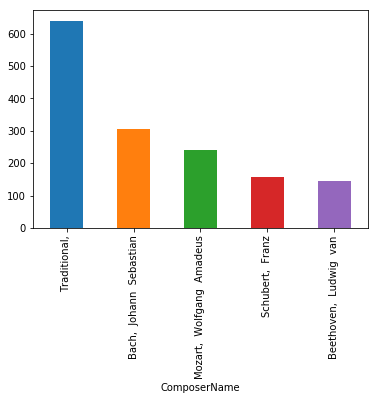

In [109]:
no_intervals = works['Interval'].isnull()
df_no_intervals = subset(works,mask)

df_work_related = df_no_intervals.filter(items=work_related_columns)

(df_work_related.groupby('ComposerName').filter(lambda x: x.shape[0] > 10)
                .drop(columns='Movement')
                .drop_duplicates()
                .groupby('ComposerName').size()
                .nlargest()
                .plot(kind='bar'));

Code flows from top to bottom, and the function parameters are always near the function. 

Also, you eliminate an extra variable for each intermediate steps.

Now, explicitly naming things is good. Ideally, you want to chain functions that make sense together and encapsulate them in logically.

In [31]:
def get_top_5_composers(df):
    df = df.copy()
    
    no_intervals = df['Interval'].isnull()
    df = subset(df, no_intervals)
    
    work_related_columns = ['ComposerName', 'WorkTitle', 'Movement']
    
    df = (df.filter(work_related_columns)
            .groupby('ComposerName').filter(lambda x: x.shape[0] > 10)
            .drop(columns='Movement')
            .drop_duplicates()
            .groupby('ComposerName').size()
            .nlargest())
    return df

top_5_composers = get_top_5_composers(works)
top_5_composers

ComposerName
Traditional,                  640
Bach,  Johann  Sebastian      306
Mozart,  Wolfgang  Amadeus    242
Schubert,  Franz              158
Beethoven,  Ludwig  van       144
dtype: int64

Another drawback to excessively long chains is that debugging is harder, as there no intermediate values to inspect.

**Segregate your code as to avoid long chains and keep only together what belongs together.**

(In case of doubt, read [The Zen of Python](https://www.python.org/dev/peps/pep-0020/) out loud ten times.)

### 1.2.5 Custom methods and pipes

Now, for the final trick.

The function `subset()` has the exact signature we want, again:
* It receives a dataframe
* It return a transformed dataframe.

What if Pandas had a way to include such functions in pipelines? Meet `df.pipe()`!

The method `df.pipe()` allows us to include user-defined functions in method chains (aka pipelines).

It works like this.

C:\Users\jnpicao\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


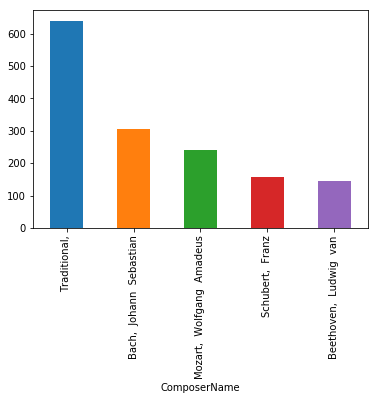

In [32]:
(df_work_related.pipe(subset, no_intervals)
                .filter(items=work_related_columns)
                .groupby('ComposerName').filter(lambda x: x.shape[0] > 10)
                .drop(columns='Movement')
                .drop_duplicates()
                .groupby('ComposerName').size()
                .nlargest()
                .plot(kind='bar'));

So, this should work.

In [33]:
def get_top_5_composers(df):
    no_intervals = df['Interval'].isnull()
    work_related_columns = ['ComposerName', 'WorkTitle', 'Movement']
    
    df = df.copy()
    df = (df.pipe(subset, no_intervals)
            .filter(items=work_related_columns)
            .groupby('ComposerName').filter(lambda x: x.shape[0] > 10)
            .drop(columns='Movement')
            .drop_duplicates()
            .groupby('ComposerName').size()
            .nlargest())
    
    return df

top_5_composers = get_top_5_composers(works)
top_5_composers

ComposerName
Traditional,                  640
Bach,  Johann  Sebastian      306
Mozart,  Wolfgang  Amadeus    242
Schubert,  Franz              158
Beethoven,  Ludwig  van       144
dtype: int64

And it does!

Now, we have all the tools we need to build robust data transformation pipelines in Pandas.

In the next Notebook, you will learn how to combine dataframes.